<a href="https://colab.research.google.com/github/RogerHeederer/NLP_practice_BERT_O/blob/master/Word_count_sample_ko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

본 학습의 레퍼런스는 KEPCO 자연어 처리 교육 / 정유채 교수님 자료이며, 개별 학습을 위한 용도임을 밝힙니다.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
ls /content/gdrive/'My Drive'/RogerHeederer/NLP_practice_BERT_O/review_data/

extreme_job_review2.txt  test_data_12.csv  test_data_14.csv
test_data_11.csv         test_data_13.csv  train_data_all.csv


In [4]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [5]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [6]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 15.0MB/s 
     |████████████████████████████████| 3.8MB 34.0MB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-08-26 09:21:37--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.0, 18.205.93.1, 18.205.93.2, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.0|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz

In [8]:
import MeCab
import pandas as pd
import numpy as np

In [9]:
tagger = MeCab.Tagger()
with open('/content/gdrive/My Drive/RogerHeederer/NLP_practice_BERT_O/review_data/extreme_job_review2.txt', 'r', encoding='utf-8') as f:
  my_sentence=f.read()

my_sentence

'<아 재밌다!! 또 봐야지!!>\n코미디 영화의 미덕은 뭐니 뭐니 해도 웃기는 거다.\n다만 그 소재와 방법이 개개인의 취향에 들어맞느냐가 관건인데 이 영화는 딱 내 취향이었다.\n스물로 코미디 영화의 장인이라는 이미지가 각인된 이병헌 감독의 작품답게 작정하고 웃기려는 시도가 영화 내내 이어진다. 근데 이게 참 타율이 무척 높다.\n초반에는 너무 뻔하다 싶었던 개그코드들이 중반을 넘어서 후반으로 가면서부터 캐릭터와 상황들과 잘 맞아떨어지면서 웃음폭탄이 터진다. 별거 아닐 수도 있고 병맛일수도 있는데 그냥 막무가내로 웃긴다.\n그냥 생각 없이, 혹은 가볍게 웃을 수 있는 영화를 찾는다면 딱일 듯!!!\n배우들의 연기와 캐릭터도 참 좋았다.\n류승룡 배우는 드디어 딱 맞는 옷을 입은 듯... 염력에선 영화와 맞지 않는 옷을 입은듯했지만 이 영화에선 찰떡이었다. 특히나 후반부에서 터지는 액션과 개그는 정신 못 차리고 웃게 만든다ㅋㅋㅋㅋ\n개인적으로 가장 큰 수확이었던 건 진선규 배우의 캐릭터.\n왠지 모르게 떠오르는 이미지가 있는데 그걸 억지로 비틀지 않고 교묘히 잘 사용해서 웃음을 터트린다.\n믿음직한 조연으로 잘 자리 잡아가는 거 같아서 괜히 흐뭇...\n이하늬 배우는 솔직히 큰 기대 안 했는데 진선규 배우와의 호흡이 너무 좋았다. \n다소 거칠고 털털한 캐릭터를 잘 살려준 듯...\n이동휘 배우는 기대보단 못했던 활약이지만 캐릭터의 성향상 그게 맞는듯한데 그래도 특유의 개그감은 잃지 않은 듯...\n공명 배우는 이번에 처음 봤는데 이름을 기억하게 될 정도로 연기가 인상 깊었다.\n특히나 후반부 액션신에선 씬스틸러였음ㅋㅋㅋㅋㅋ\n악역으로 등장했던 신하균, 오정세 배우들도 역시나 이름에 걸맞은 연기 잘 보여주었고...\n개그라는 게 취향 차이가 심해서 무조건적으로 추천할 순 없지만 시사회 끝나고 나가는 관객들의 반응을 보니 구정 연휴에 관객몰이 제대로 할 거 같은 기분이 들기도 한다. \n적어도 나는 조카들 데리고 한번 더 볼 생각이니까 ㅋㅋㅋ\n웃으라고 작정하

In [10]:
print(tagger.parse(my_sentence))

<	SY,*,*,*,*,*,*,*
아	IC,*,F,아,*,*,*,*
재밌	VA,*,T,재밌,*,*,*,*
다	EF,*,F,다,*,*,*,*
!	SF,*,*,*,*,*,*,*
!	SY,*,*,*,*,*,*,*
또	MAG,성분부사|시간부사,F,또,*,*,*,*
봐야지	VV+EF,*,F,봐야지,Inflect,VV,EF,보/VV/*+ㅏ야지/EF/*
!	SF,*,*,*,*,*,*,*
!>	SY,*,*,*,*,*,*,*
코미디	NNG,*,F,코미디,*,*,*,*
영화	NNG,*,F,영화,*,*,*,*
의	JKG,*,F,의,*,*,*,*
미덕	NNG,정적사태,T,미덕,*,*,*,*
은	JX,*,T,은,*,*,*,*
뭐	NP,*,F,뭐,Inflect,NP,NP,뭣/NP/*
니	VCP+EC,*,F,니,Inflect,VCP,EC,이/VCP/*+니/EC/*
뭐	NP,*,F,뭐,Inflect,NP,NP,뭣/NP/*
니	VCP+EC,*,F,니,Inflect,VCP,EC,이/VCP/*+니/EC/*
해도	VV+EC,*,F,해도,Inflect,VV,EC,하/VV/*+아도/EC/*
웃기	VV,*,F,웃기,*,*,*,*
는	ETM,*,T,는,*,*,*,*
거	NNB,*,F,거,Inflect,NNB,NNB,것/NNB/*
다	VCP+EF,*,F,다,Inflect,VCP,EF,이/VCP/*+다/EF/*
.	SF,*,*,*,*,*,*,*
다만	MAJ,*,T,다만,*,*,*,*
그	MM,~명사,F,그,*,*,*,*
소재	NNG,*,F,소재,*,*,*,*
와	JC,*,F,와,*,*,*,*
방법	NNG,*,T,방법,*,*,*,*
이	JKS,*,F,이,*,*,*,*
개개인	NNG,*,T,개개인,Compound,*,*,개개/NNG/*+인/NNG/*
의	JKG,*,F,의,*,*,*,*
취향	NNG,*,T,취향,*,*,*,*
에	JKB,*,F,에,*,*,*,*
들어맞	VV,*,T,들어맞,*,*,*,*
느냐	EC,*,F,느냐,*,*,*,*
가	JKS,*,F,가,*,*,*,*
관건	NNG,*,T,관건,*,*,*,*

In [11]:
def mecabsplit(mecab_tagger,inputs, pos):
    r=[]
    inputs = mecab_tagger.parse(inputs)
    t = inputs.split('\n')[:-2]
    for i in t:
        field = i.split('\t')
        if field[1].split(',')[-1] is not '*':
            r.extend( [ (x.split('/')[0],x.split('/')[1]) for x in field[1].split(',')[-1].split('+') ] )
        else:
            r.append( (field[0],field[1].split(',')[0]) )
    if pos:
        return r
    else:
        return [ x[0] for x in r ]
    return r

In [74]:
# 일반 명사
nng = [word for word, tag in mecabsplit(tagger, my_sentence, True) if tag=='NNG']
# 고유 명사
nnp = [word for word, tag in mecabsplit(tagger, my_sentence, True) if tag=='NNP']

In [75]:
pd.DataFrame(nnp)

,0
0,이병헌
1,류승룡
2,진선규
3,이하늬
4,진선규
5,이동휘
6,씬
7,스틸러
8,신하균
9,오정세


In [76]:
pd.DataFrame(nng)

,0
0,코미디
1,영화
2,미덕
3,소재
4,방법
...,...
249,무비
250,부부
251,가족
252,직업


In [77]:
from collections import Counter, OrderedDict

In [78]:
# Colab에서 matplotlib 한글 깨짐 현상 해결
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'

!apt autoremove
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [84]:

count_list=Counter(nng)
print(len(count_list))

155


In [85]:
nng_sorted_list = count_list.most_common()

In [86]:
nng_sorted_list=OrderedDict(nng_sorted_list)

In [92]:
nng_sorted_list['수사']

1

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

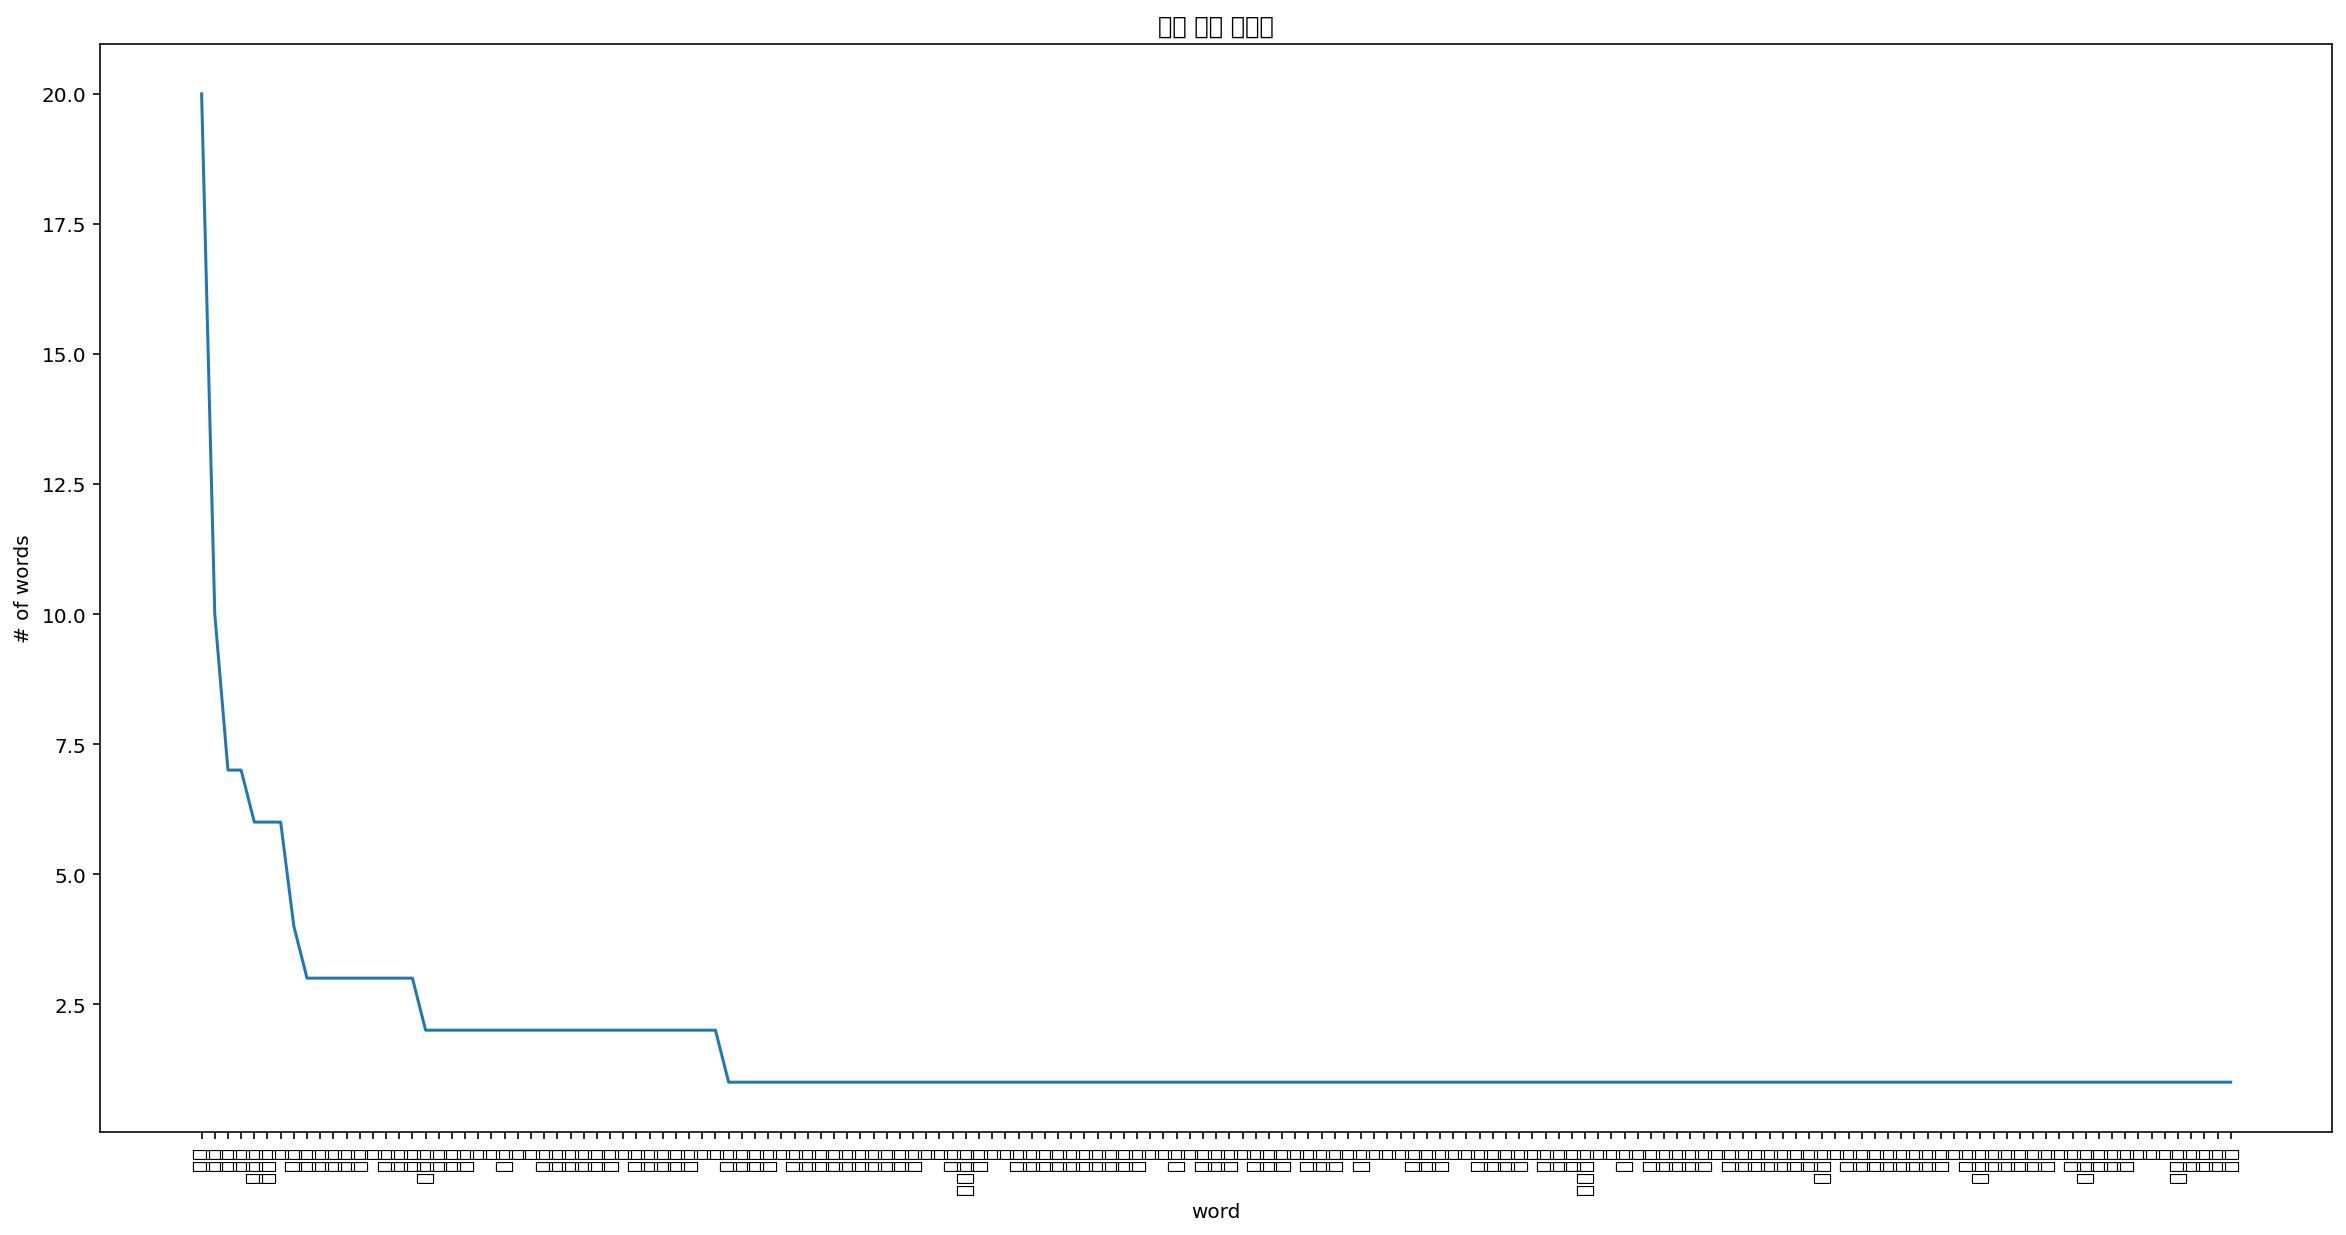

In [93]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.plot(list(nng_sorted_list.keys()), list(nng_sorted_list.values()))
plt.title("일반 명사 빈도수")
plt.ylabel("# of words")
plt.xlabel("word")
plt.show()

In [94]:


count_list=Counter(nnp)
print(len(count_list))

nnp_sorted_list = count_list.most_common()
nnp_sorted_list = OrderedDict(nnp_sorted_list)

17


In [95]:
nnp_sorted_list

OrderedDict([('류승룡', 6),
             ('진선규', 4),
             ('이동휘', 4),
             ('이하늬', 3),
             ('신하균', 3),
             ('빅리그', 3),
             ('홍콩', 3),
             ('이병헌', 2),
             ('한국', 2),
             ('씬', 1),
             ('스틸러', 1),
             ('오정세', 1),
             ('알바로', 1),
             ('노', 1),
             ('지루함', 1),
             ('주성치', 1),
             ('앰', 1)])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

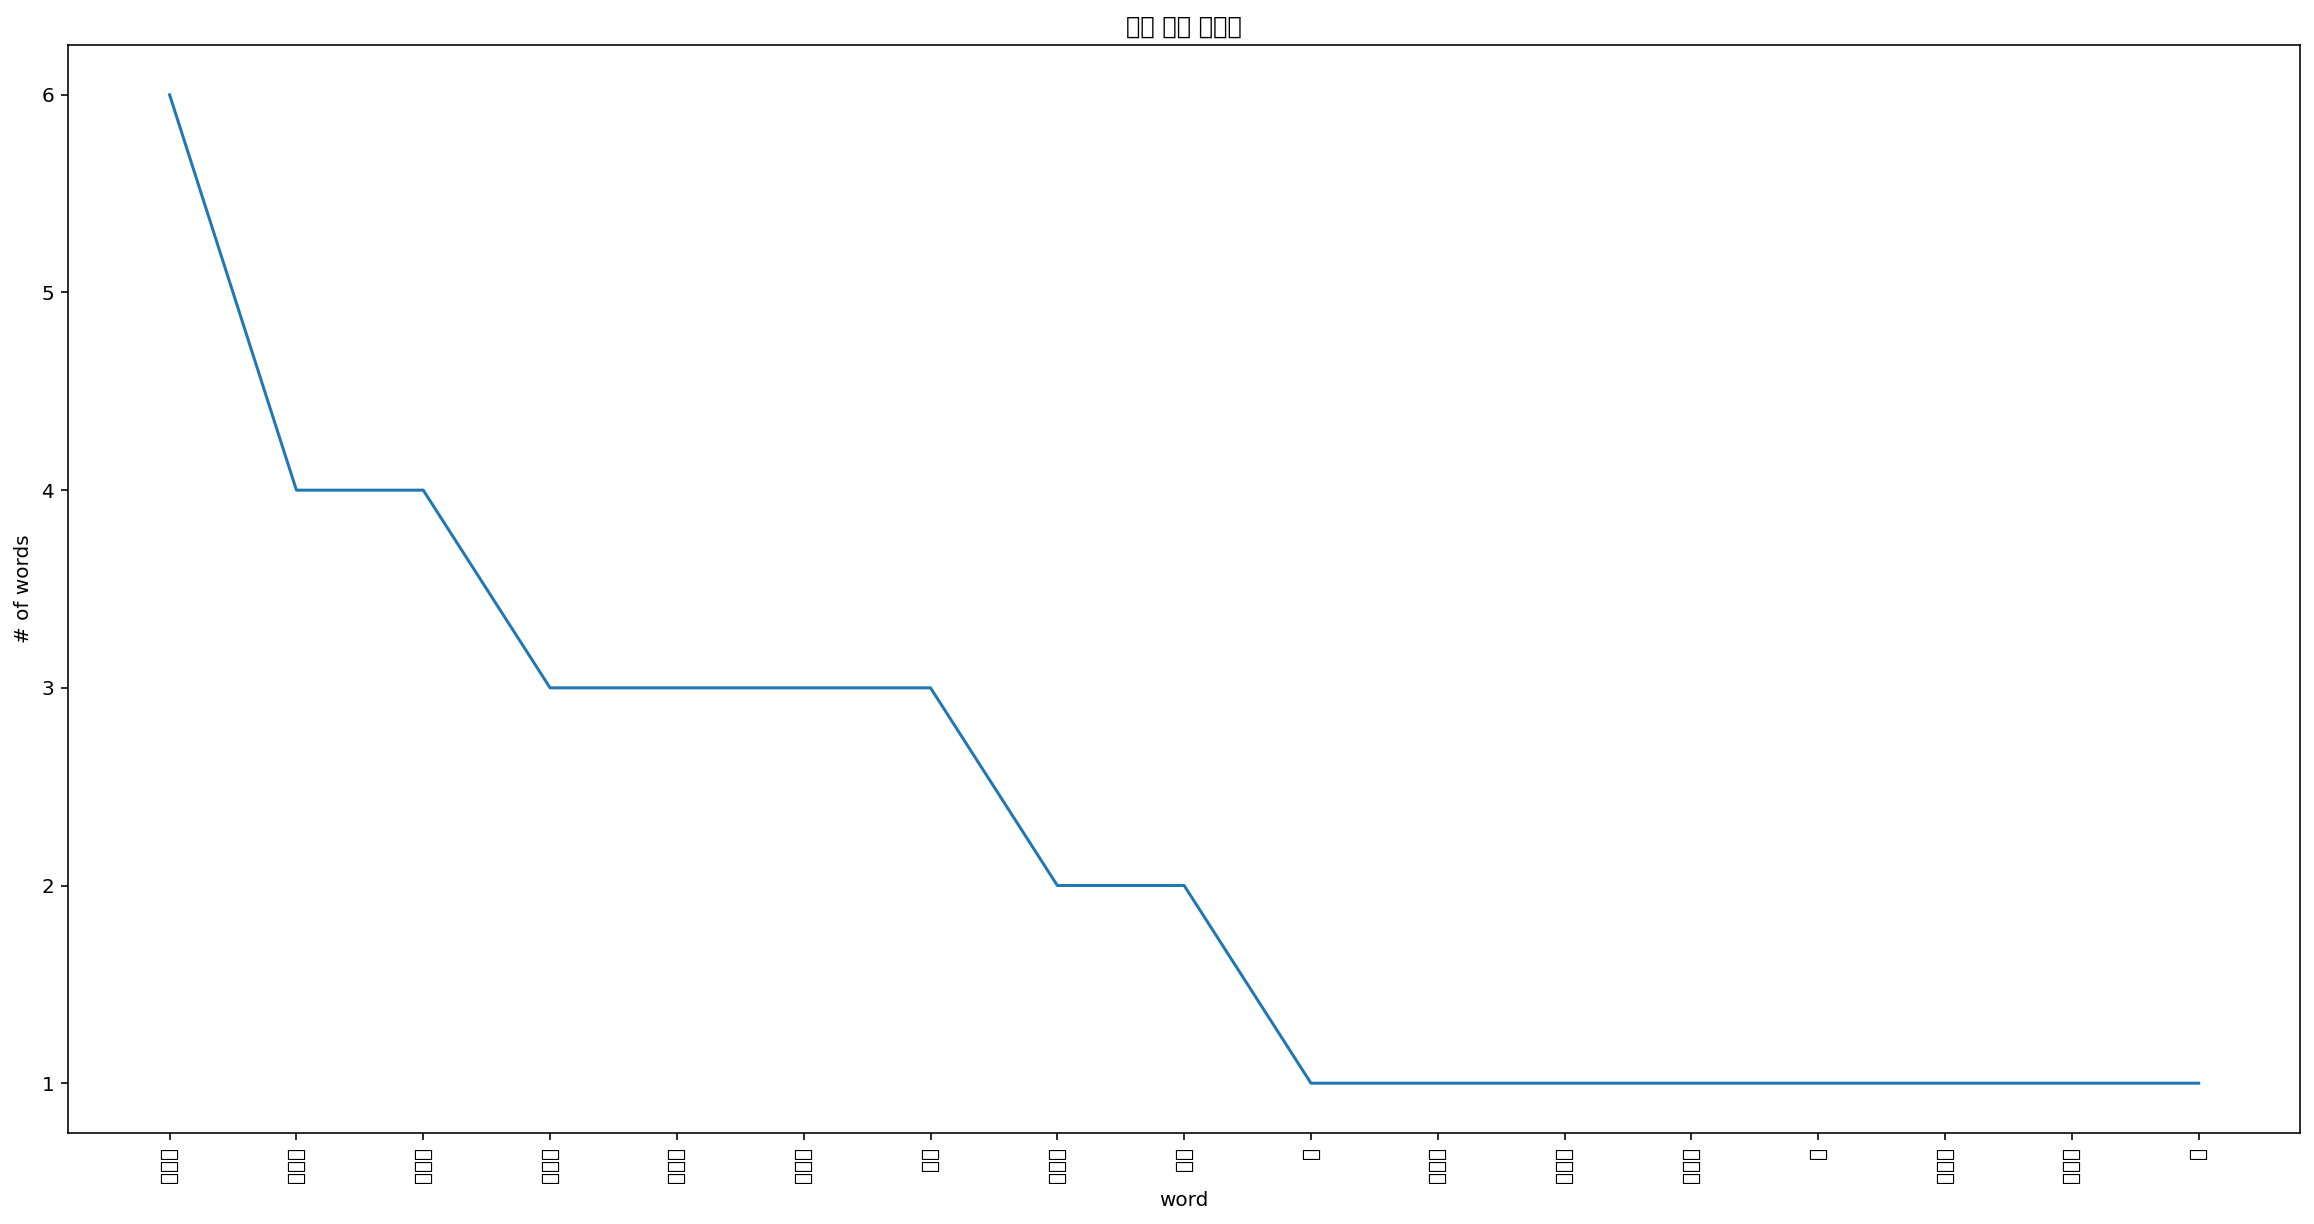

In [96]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.plot(list(nnp_sorted_list.keys()), list(nnp_sorted_list.values()))
plt.title("일반 명사 빈도수")
plt.ylabel("# of words")
plt.xlabel("word")
plt.show()

In [97]:
from wordcloud import WordCloud

In [101]:
wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                      font_path=fontpath,
                      min_font_size = 10).generate_from_frequencies(nnp_sorted_list)

In [102]:
nnp_sorted_list

OrderedDict([('류승룡', 6),
             ('진선규', 4),
             ('이동휘', 4),
             ('이하늬', 3),
             ('신하균', 3),
             ('빅리그', 3),
             ('홍콩', 3),
             ('이병헌', 2),
             ('한국', 2),
             ('씬', 1),
             ('스틸러', 1),
             ('오정세', 1),
             ('알바로', 1),
             ('노', 1),
             ('지루함', 1),
             ('주성치', 1),
             ('앰', 1)])

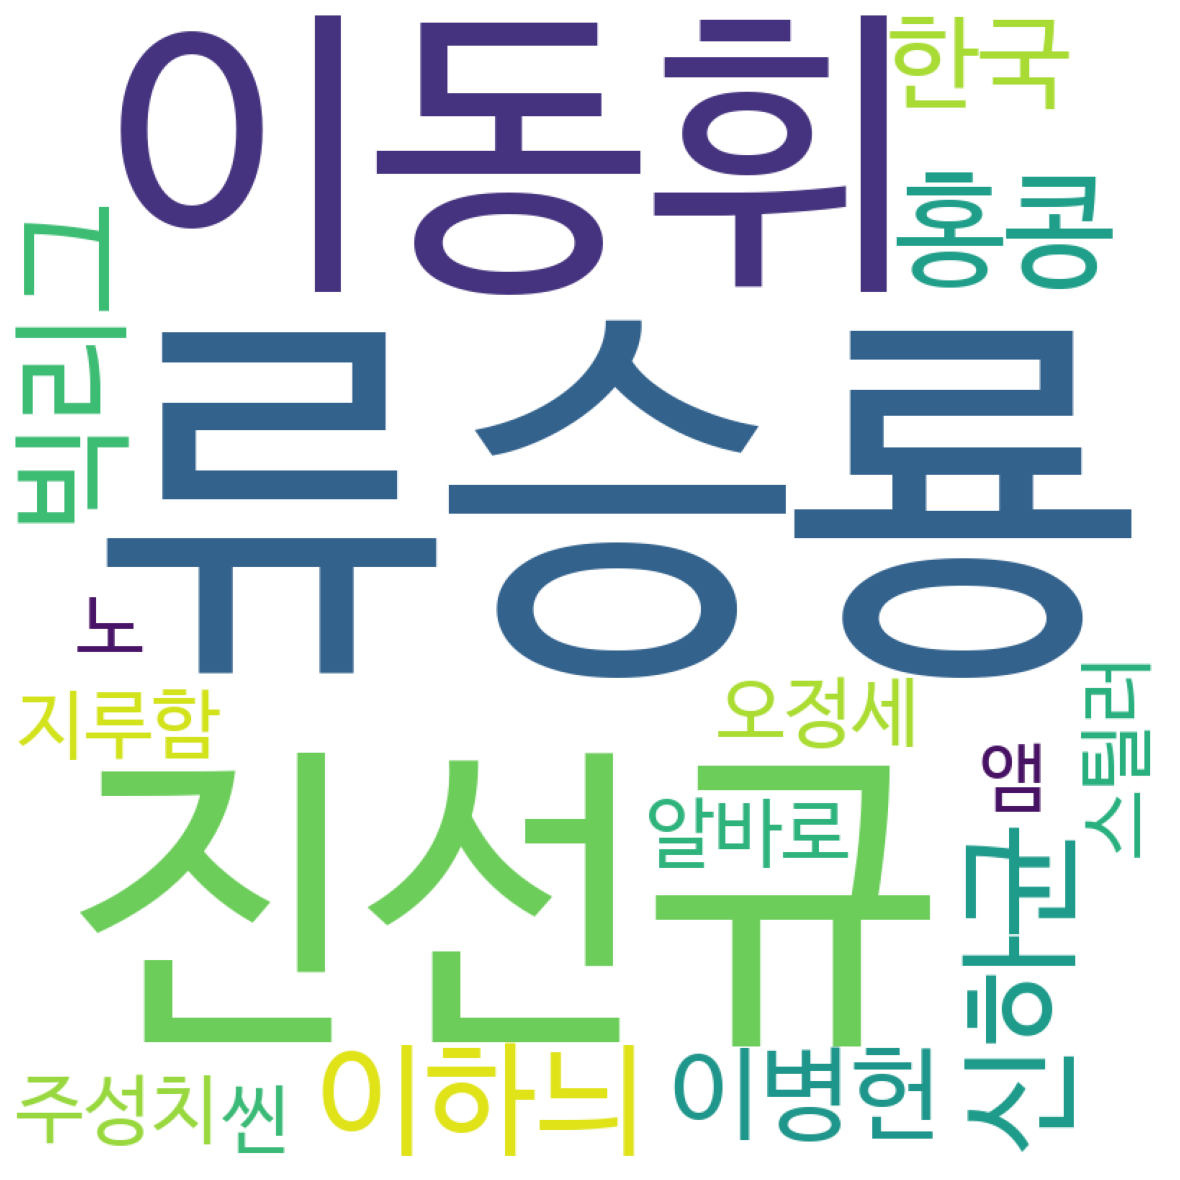

In [103]:
plt.figure(figsize= (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

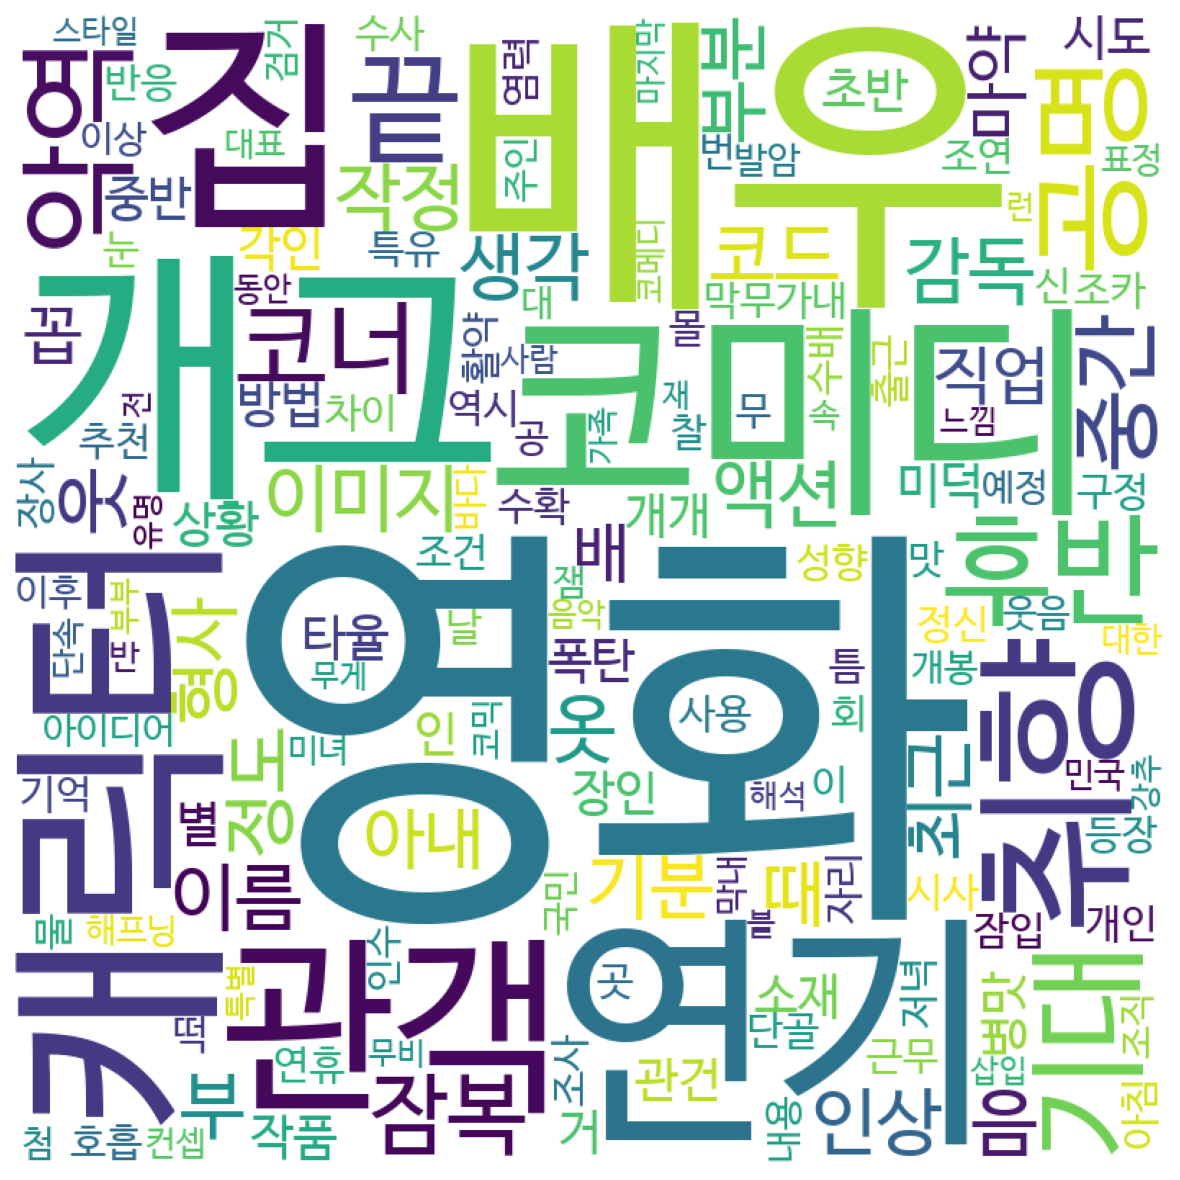

In [104]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                font_path=fontpath,
                min_font_size = 10).generate_from_frequencies(nng_sorted_list) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor =  None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 